In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
def plotEachIterationPositions(positions_history):
    # Plot the positions of each node in every iteration
    for i, positions in enumerate(positions_history):
        plt.figure()
        plt.scatter(positions[:, 0], positions[:, 1])
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.title(f'Position Of Nodes at iteration {i}')
        plt.grid()

    plt.show()

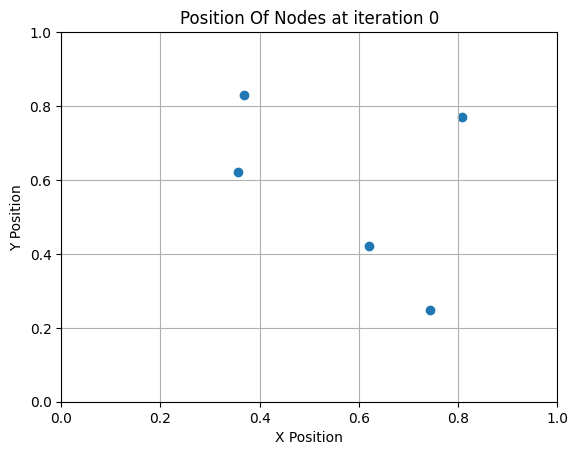

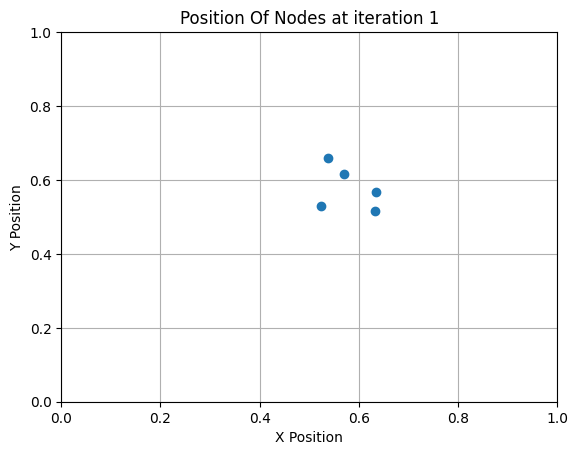

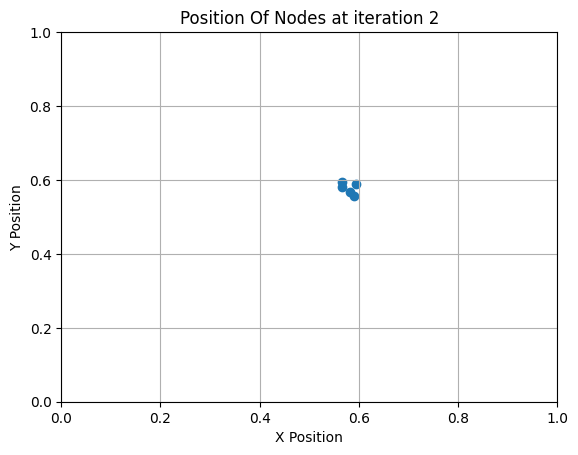

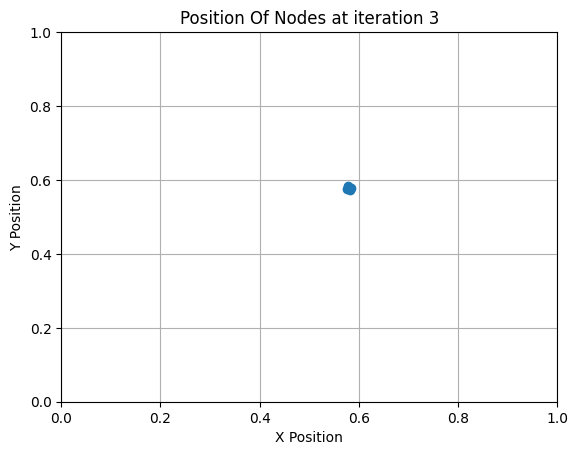

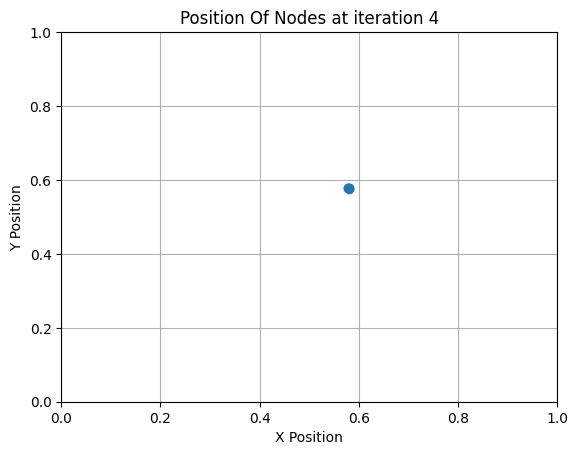

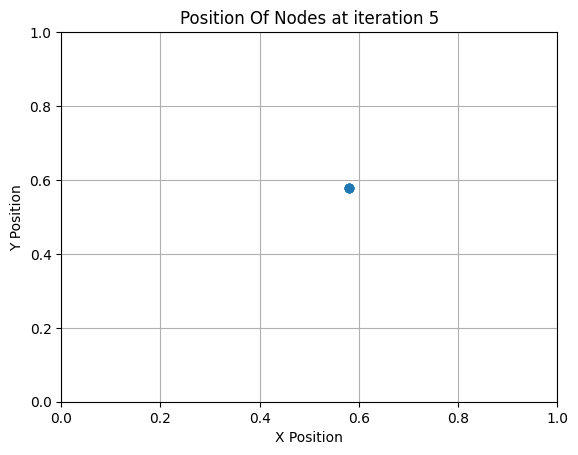

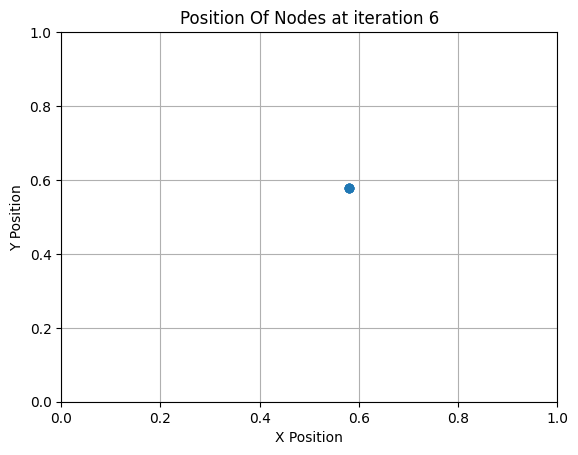

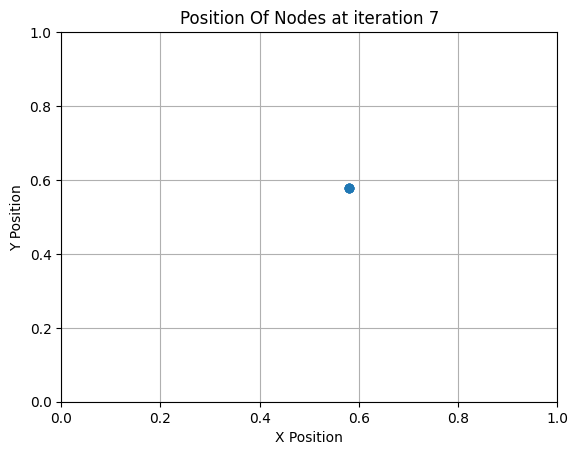

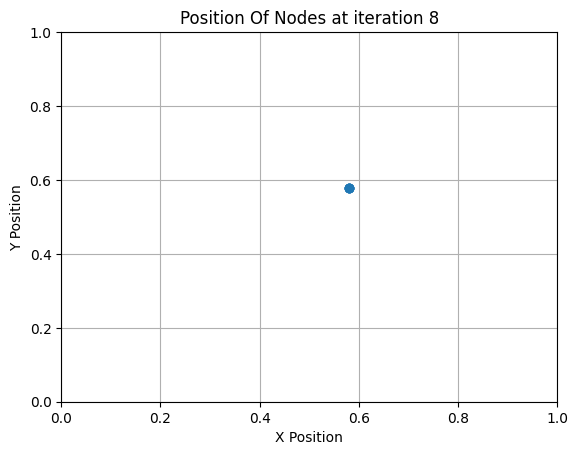

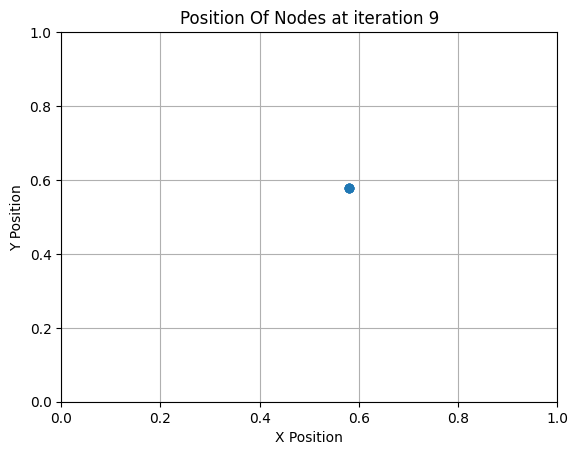

In [200]:
r = 0.9  # Choose an appropriate value for r
num_nodes = 5
iterations = 50   # if the nodes doesn't converges within 50 iterations, we assume that it doesn't converges at all

# Initialize node positions uniformly within a 1x1 unit square
node_positions = np.random.rand(num_nodes, 2)

positions_history = [node_positions.copy()]

# Perform the simulation
for iteration in range(iterations):
    new_node_positions = node_positions.copy()
    for i in range(num_nodes):
        neighbor_positions = []
        for j in range(num_nodes):
            if i != j and np.linalg.norm(node_positions[i] - node_positions[j]) <= r:
                neighbor_positions.append(node_positions[j])
        if neighbor_positions:
            new_node_positions[i] = np.mean(neighbor_positions, axis=0)
    
    # Check for convergence by comparing the positions to a tolerance level
    if np.allclose(node_positions, new_node_positions, rtol = 1e-5):
        break;
    
    node_positions = new_node_positions
    positions_history.append(node_positions.copy())

# Plot the positions of each node in every iteration
plotEachIterationPositions(positions_history);


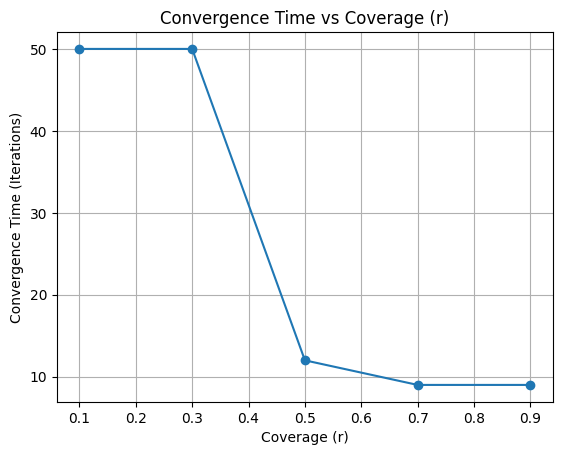

In [199]:
r_values = [0.1, 0.3, 0.5, 0.7, 0.9]

initial_node_positions = np.random.rand(num_nodes, 2)

convergence_times = []

# Perform the simulation for each value of r
for r in r_values:
    positions_history = [node_positions.copy()]
    node_positions = initial_node_positions.copy()  # Initialize with original positions
    converged = False
    for iteration in range(iterations):
        new_node_positions = node_positions.copy()
        for i in range(num_nodes):
            neighbor_positions = []
            for j in range(num_nodes):
                if i != j and np.linalg.norm(node_positions[i] - node_positions[j]) <= r:
                    neighbor_positions.append(node_positions[j])
            if neighbor_positions:
                new_node_positions[i] = np.mean(neighbor_positions, axis=0)
                
        node_positions = new_node_positions
        positions_history.append(node_positions.copy())
        
        # Check for convergence by comparing the positions to a tolerance level
        if iteration > 0 and np.allclose(positions_history[-1], positions_history[-2], rtol=1e-5):
            converged = True
            convergence_times.append(iteration)
            break
    
    if not converged:
        convergence_times.append(iterations)  # Non-convergence case

# Plot the convergence times for different values of r
plt.plot(r_values, convergence_times, marker='o')
plt.xlabel('Coverage (r)')
plt.ylabel('Convergence Time (Iterations)')
plt.title('Convergence Time vs Coverage (r)')
plt.grid(True)
plt.show()
